This project first calculated the redshift of a number of spectra which in turn was used to correct for time dilation when analysing light curves in the B-band. Peak magnitude in the B-band was found, followed by the light curve width $\Delta m_{15}(B)$. A Hubble diagram was created using the light curve widths and peak absolute magnitudes which found a luminosity-decline rate relation. Finally, three different models are explored in order to deduce the most accurate in calculating distance modulus.

File Name                                             Modified             Size
Data_for_download/                             2023-03-29 13:36:12            0
Data_for_download/.DS_Store                    2023-03-29 13:36:22        10244
__MACOSX/Data_for_download/._.DS_Store         2023-03-29 13:36:22          120
Data_for_download/SN_spectra/                  2023-03-28 13:51:50            0
Data_for_download/SN_lightcurves/              2023-03-28 13:51:44            0
Data_for_download/Galaxy_lines.txt             2023-03-28 13:51:04          172
__MACOSX/Data_for_download/._Galaxy_lines.txt  2023-03-28 13:51:04          227
Data_for_download/SN_spectra/sn2000cn_spec.ascii 2022-03-30 21:00:30       284796
Data_for_download/SN_spectra/sn1999dq_spec.ascii 2022-07-11 10:32:50       144180
__MACOSX/Data_for_download/SN_spectra/._sn1999dq_spec.ascii 2022-07-11 10:32:50          232
Data_for_download/SN_spectra/.DS_Store         2023-03-29 12:24:20         6148
__MACOSX/Data_for_downl

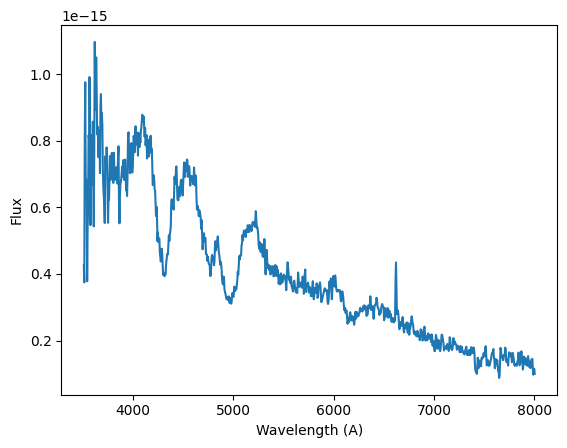

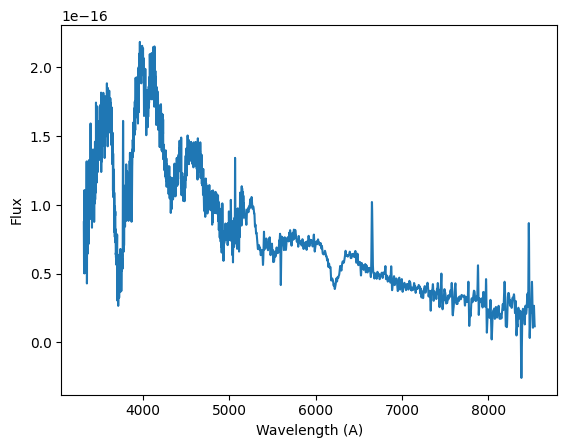

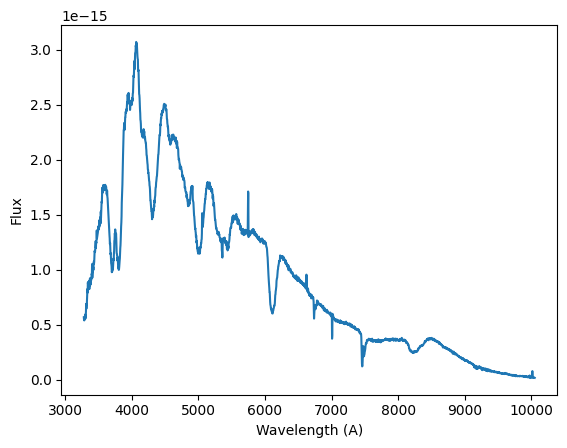

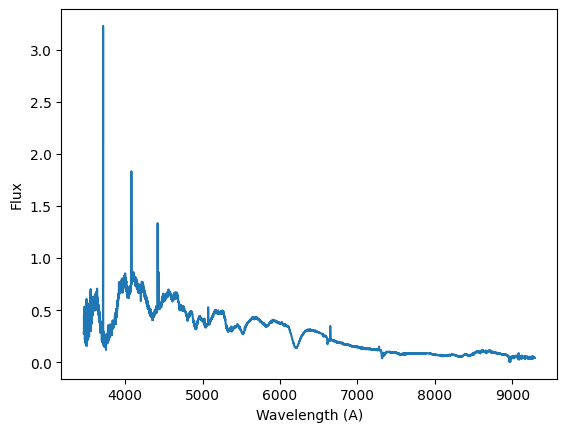

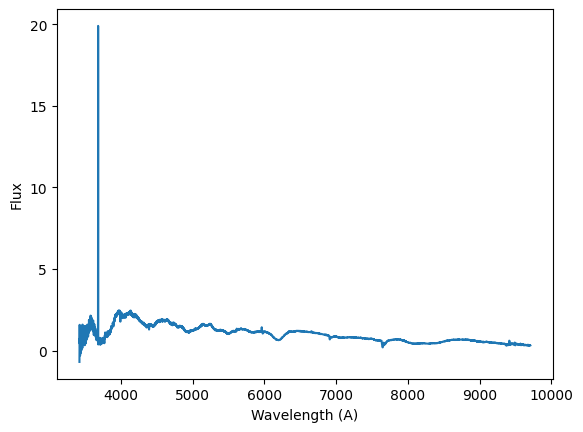

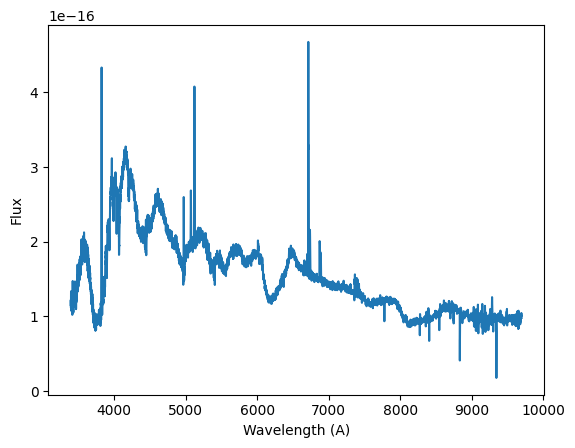

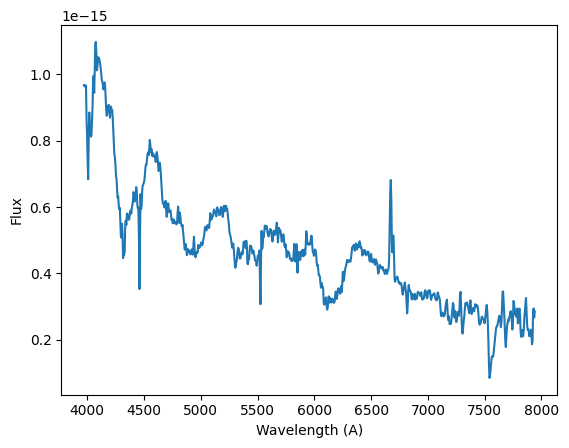

In [82]:
#!pip install pandas
#!pip install astropy

#import libraries
import numpy as np
import matplotlib.pyplot as plt
import io
import zipfile
import pandas as pd
import mpld3
from mpld3 import plugins
from astropy.io import ascii
import scipy.optimize as opt
import astropy.cosmology as acos
from scipy.stats import linregress

with zipfile.ZipFile('Data_for_download2324.zip', 'r') as archive:
    archive.printdir()

    paths = ['sn1997bp_spec.ascii', 'sn1997E_spec.ascii', 'sn1998es_spec.ascii', 'sn1999aa_spec.ascii', 'sn1999dq_spec.ascii', 'sn2000cn_spec.ascii', 'sn2000dk_spec.ascii' ]

    SN_spectra = []

    for path in paths:
        with archive.open(f'Data_for_download/SN_spectra/{path}') as file:
            data = np.loadtxt(io.TextIOWrapper(file))
            SN_spectra.append(data)

print(SN_spectra)

#turn data in data frames using pandas and plot the output
spectra_dataframes = []
for i in SN_spectra:
    spectra_df = pd.DataFrame(data=i)
    spectra_dataframes.append(spectra_df)
    plt.figure()
    plt.plot(spectra_df.iloc[:,0], spectra_df.iloc[:,1])
    plt.xlabel('Wavelength (A)')
    plt.ylabel('Flux')


print(spectra_df.head()) 

In [83]:
#download galaxy lines
galaxy_lines = open('Data_for_download/Galaxy_lines.txt')
print(galaxy_lines.read())
galaxy_lines_list = [4341, 4861, 6563, 6548, 6583, 3727, 4959, 5007, 5890, 5896, 2798, 6717, 6731, 3969, 3934]
redshift_list = []
redshift_errors_list = []

Typical galaxy lines in Angstroms
H 4341
H 4861
H 6563
NII 6548 
NII 6583
OII 3727
OIII 4959 
OIII 5007
NaI 5890 
NaI 5896
MgII 2798
SII 6717 
SII 6731
CaII 3969 
CaII 3934


min index =  652
max index =  674
max of flux slice = 4.34418e-16
wl of max flux = 6621.72
[1.80700551e-16 4.48416036e-01 4.43566068e-01]
657
4
6583
6621.72
Redshift =  0.0058818168008507145 nm error 0.44841603564643057 nm


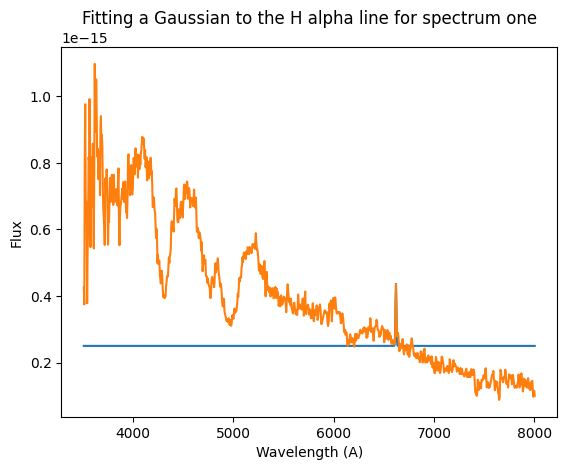

In [84]:
###SPECTRUM ONE###
 
#defining lists that will be appended
fitted_amplitudes = []
fitted_centers = []
fitted_widths = []

#defining the columns in the first spectrum
wl = SN_spectra[0][:,0]
flux = SN_spectra[0][:,1]

#To slice a setion of the wavelengths
def find_nearest(array, value):
    array = np.asarray(array)
    index = (np.abs(array-value)).argmin()
    return index

min_idx = find_nearest(wl, 6600)
max_idx = find_nearest(wl, 6700)

print('min index = ', min_idx)
print('max index = ', max_idx)

wl_slice = (wl[min_idx:max_idx])
flux_slice = (flux[min_idx:max_idx])

#To find the maximum flux within the list
flux_slice_list = list(flux_slice)
max_of_flux_slice = np.max(flux_slice_list)
print('max of flux slice =', max_of_flux_slice)

#To find the index of the maximum flux within the slice
index_of_max_flux = flux_slice_list.index(max_of_flux_slice)

#To extract the same index of the wavelength slice
wl_slice_list = list(wl_slice)
wl_of_max_flux = wl_slice_list[index_of_max_flux]
print('wl of max flux =', wl_of_max_flux)

#defining the Gaussian function
def gaussian(x, amp, cen, wid):
    return (amp / (np.sqrt(2 * np.pi) * wid))* np.exp(-(x - cen)**2 / (2*wid**2)) + 0.25*10**(-15)

#defining the initial guess manually, [amp, cen, wid, offset]
initial_guess = [1*10**(-15), wl_of_max_flux, 1]

#optimizing the guess
popt, pcov = opt.curve_fit(gaussian, wl_slice, flux_slice, p0 = initial_guess)
stdevs = np.sqrt(np.diag(pcov))
print(stdevs)
#Extract fitted parameters
amp_fit, cen_fit, wid_fit = popt

#Append fitted parameters to lists
fitted_amplitudes.append(amp_fit)
fitted_centers.append(cen_fit)
fitted_widths.append(wid_fit)

plt.plot(wl, gaussian(wl, amp_fit, cen_fit, wid_fit))

plt.plot(wl, flux)
maximum_argument = np.argmax(gaussian(wl, amp_fit, cen_fit, wid_fit))
print(maximum_argument)
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux')
plt.title('Fitting a Gaussian to the H alpha line for spectrum one')
#mpld3.display()

closest_peak = find_nearest(galaxy_lines_list, wl_of_max_flux)
print(closest_peak)

closest_peak_wl = galaxy_lines_list[closest_peak]
print(closest_peak_wl)
print(wl_of_max_flux)

#To find the redshift:
z = (wl_of_max_flux - closest_peak_wl)/closest_peak_wl
redshift_list.append(z)
redshift_errors_list.append(stdevs[1])
print('Redshift = ', z, 'nm', 'error', stdevs[1], 'nm')

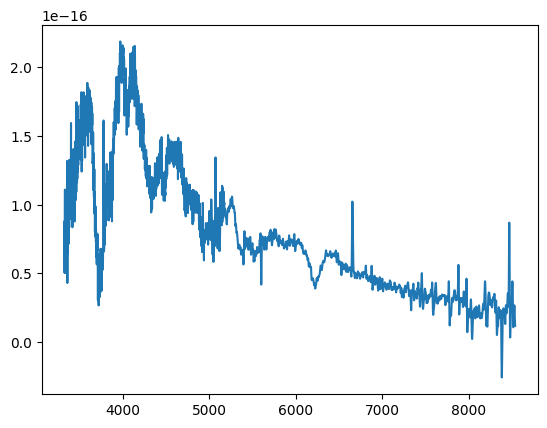

In [85]:
plt.plot(SN_spectra[1][:,0], SN_spectra[1][:,1])

min index =  3301
max index =  3820
max of flux slice = 1.02133e-16
wl of max flux = 6652.14
3460
11
6717
6652.14
Redshift =  -0.009656096471639076 nm error 0.2591620165666008 nm


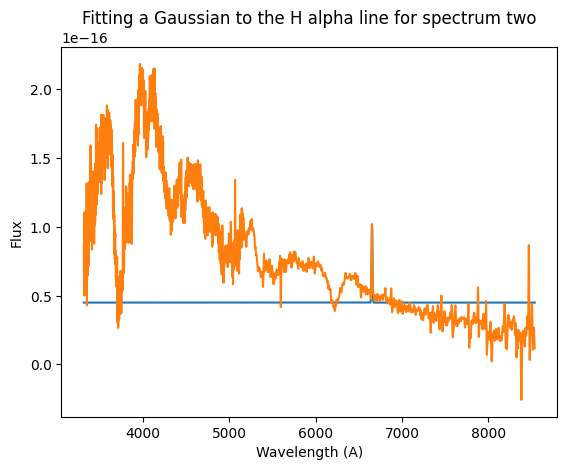

In [86]:
###SPECTRUM TWO###
 
#defining lists that will be appended
fitted_amplitudes = []
fitted_centers = []
fitted_widths = []

#defining the columns in the first spectrum
wl = SN_spectra[1][:,0]
flux = SN_spectra[1][:,1]

#To slice a setion of the wavelengths
def find_nearest(array, value):
    array = np.asarray(array)
    index = (np.abs(array-value)).argmin()
    return index

min_idx = find_nearest(wl, 6500)
max_idx = find_nearest(wl, 7000)

print('min index = ', min_idx)
print('max index = ', max_idx)

wl_slice = (wl[min_idx:max_idx])
flux_slice = (flux[min_idx:max_idx])

#To find the maximum flux within the list
flux_slice_list = list(flux_slice)
max_of_flux_slice = np.max(flux_slice_list)
print('max of flux slice =', max_of_flux_slice)

#To find the index of the maximum flux within the slice
index_of_max_flux = flux_slice_list.index(max_of_flux_slice)

#To extract the same index of the wavelength slice
wl_slice_list = list(wl_slice)
wl_of_max_flux = wl_slice_list[index_of_max_flux]
print('wl of max flux =', wl_of_max_flux)

#defining the Gaussian function
def gaussian(x, amp, cen, wid):
    return (amp / (np.sqrt(2 * np.pi) * wid))* np.exp(-(x - cen)**2 / (2*wid**2)) + 0.45*10**(-16)

#defining the initial guess manually, [amp, cen, wid, offset]
initial_guess = [1.25*10**(-16), wl_of_max_flux, 1]

#optimizing the guess
popt, pcov = opt.curve_fit(gaussian, wl_slice, flux_slice, p0 = initial_guess)
stdevs = np.sqrt(np.diag(pcov))

#Extract fitted parameters
amp_fit, cen_fit, wid_fit = popt

#Append fitted parameters to lists
fitted_amplitudes.append(amp_fit)
fitted_centers.append(cen_fit)
fitted_widths.append(wid_fit)

plt.plot(wl, gaussian(wl, amp_fit, cen_fit, wid_fit))

plt.plot(wl, flux)
maximum_argument = np.argmax(gaussian(wl, amp_fit, cen_fit, wid_fit))
print(maximum_argument)
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux')
plt.title('Fitting a Gaussian to the H alpha line for spectrum two')
#mpld3.display()

#To calculate the redshift
closest_peak = find_nearest(galaxy_lines_list, wl_of_max_flux)
print(closest_peak)

closest_peak_wl = galaxy_lines_list[closest_peak]
print(closest_peak_wl)
print(wl_of_max_flux)

#To find the redshift:
z = (wl_of_max_flux - closest_peak_wl)/closest_peak_wl
redshift_list.append(z)
redshift_errors_list.append(stdevs[1])
print('Redshift = ', z, 'nm', 'error', stdevs[1], 'nm')

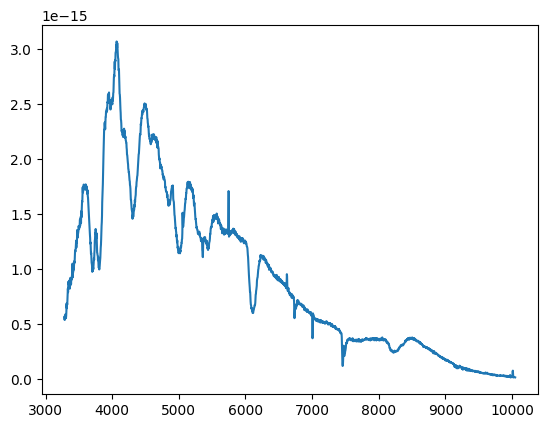

In [87]:
x3 = SN_spectra[2][:,0]
y3 = SN_spectra[2][:,1]
plt.plot(x3, y3)

min index =  729
max index =  823
max of flux slice = 1.71004e-15
wl of max flux = 5746.73
[7.44912996e-12 3.07557101e+01 1.06413015e+03]
775
8
5890
5746.73
Redshift =  -0.024324278438030634 nm error 30.755710076827125 nm


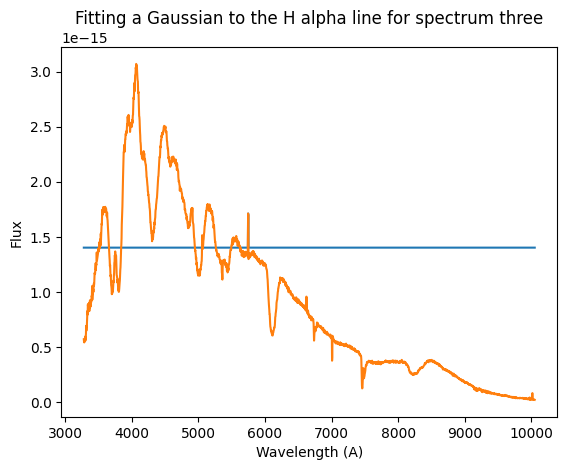

In [88]:
###SPECTRUM THREE###
 
#defining lists that will be appended
fitted_amplitudes = []
fitted_centers = []
fitted_widths = []

#defining the columns in the first spectrum
wl = SN_spectra[2][:,0]
flux = SN_spectra[2][:,1]

min_idx = find_nearest(wl, 5600)
max_idx = find_nearest(wl, 5900)

print('min index = ', min_idx)
print('max index = ', max_idx)

wl_slice = (wl[min_idx:max_idx])
flux_slice = (flux[min_idx:max_idx])

#To find the maximum flux within the list
flux_slice_list = list(flux_slice)
max_of_flux_slice = np.max(flux_slice_list)
print('max of flux slice =', max_of_flux_slice)

#To find the index of the maximum flux within the slice
index_of_max_flux = flux_slice_list.index(max_of_flux_slice)

#To extract the same index of the wavelength slice
wl_slice_list = list(wl_slice)
wl_of_max_flux = wl_slice_list[index_of_max_flux]
print('wl of max flux =', wl_of_max_flux)

#defining the Gaussian function
def gaussian(x, amp, cen, wid):
    return (amp / (np.sqrt(2 * np.pi) * wid))* np.exp(-(x - cen)**2 / (2*wid**2)) + 1.4*10**(-15)

#defining the initial guess manually, [amp, cen, wid, offset]
initial_guess = [0.3*10**(-15), wl_of_max_flux, 1]

#optimizing the guess
popt, pcov = opt.curve_fit(gaussian, wl_slice, flux_slice, p0 = initial_guess)
stdevs = np.sqrt(np.diag(pcov))
print(stdevs)
#Extract fitted parameters
amp_fit, cen_fit, wid_fit = popt

#Append fitted parameters to lists
fitted_amplitudes.append(amp_fit)
fitted_centers.append(cen_fit)
fitted_widths.append(wid_fit)

plt.plot(wl, gaussian(wl, amp_fit, cen_fit, wid_fit))

plt.plot(wl, flux)
maximum_argument = np.argmax(gaussian(wl, amp_fit, cen_fit, wid_fit))
print(maximum_argument)
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux')
plt.title('Fitting a Gaussian to the H alpha line for spectrum three')

closest_peak = find_nearest(galaxy_lines_list, wl_of_max_flux)
print(closest_peak)

closest_peak_wl = galaxy_lines_list[closest_peak]
print(closest_peak_wl)
print(wl_of_max_flux)

#To find the redshift:
z = (wl_of_max_flux - closest_peak_wl)/closest_peak_wl
redshift_list.append(z)
redshift_errors_list.append(stdevs[1])
print('Redshift = ', z, 'nm', 'error', stdevs[1], 'nm')

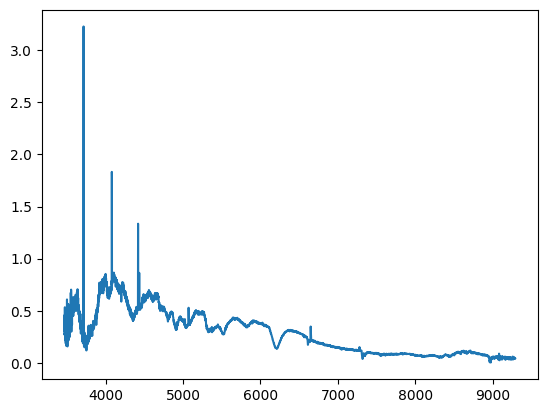

In [89]:
x3 = SN_spectra[3][:,0]
y3 = SN_spectra[3][:,1]
plt.plot(x3, y3)

min index =  154
max index =  611
max of flux slice = 3.22721
wl of max flux = 3714.93
[0.48251787 0.07532035 0.07343568]
285
5
3727
3714.93
Redshift =  -0.0032385296485109107 nm error 0.07532035307555578 nm


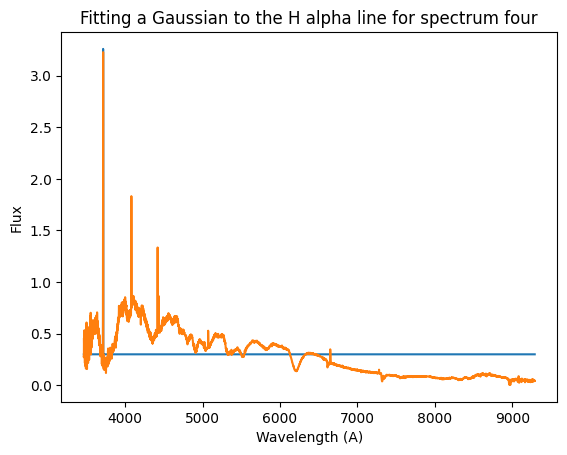

In [90]:
###SPECTRUM FOUR###
 
#defining lists that will be appended
fitted_amplitudes = []
fitted_centers = []
fitted_widths = []

#defining the columns in the first spectrum
wl = SN_spectra[3][:,0]
flux = SN_spectra[3][:,1]

min_idx = find_nearest(wl, 3600)
max_idx = find_nearest(wl, 4000)

print('min index = ', min_idx)
print('max index = ', max_idx)

wl_slice = (wl[min_idx:max_idx])
flux_slice = (flux[min_idx:max_idx])

#To find the maximum flux within the list
flux_slice_list = list(flux_slice)
max_of_flux_slice = np.max(flux_slice_list)
print('max of flux slice =', max_of_flux_slice)

#To find the index of the maximum flux within the slice
index_of_max_flux = flux_slice_list.index(max_of_flux_slice)

#To extract the same index of the wavelength slice
wl_slice_list = list(wl_slice)
wl_of_max_flux = wl_slice_list[index_of_max_flux]
print('wl of max flux =', wl_of_max_flux)

#defining the Gaussian function
def gaussian(x, amp, cen, wid):
    return (amp / (np.sqrt(2 * np.pi) * wid))* np.exp(-(x - cen)**2 / (2*wid**2)) + 0.3

#defining the initial guess manually, [amp, cen, wid, offset]
initial_guess = [3, wl_of_max_flux, 1]

#optimizing the guess
popt, pcov = opt.curve_fit(gaussian, wl_slice, flux_slice, p0 = initial_guess)
stdevs = np.sqrt(np.diag(pcov))
print(stdevs)
#Extract fitted parameters
amp_fit, cen_fit, wid_fit = popt

#Append fitted parameters to lists
fitted_amplitudes.append(amp_fit)
fitted_centers.append(cen_fit)
fitted_widths.append(wid_fit)

plt.plot(wl, gaussian(wl, amp_fit, cen_fit, wid_fit))

plt.plot(wl, flux)
maximum_argument = np.argmax(gaussian(wl, amp_fit, cen_fit, wid_fit))
print(maximum_argument)
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux')
plt.title('Fitting a Gaussian to the H alpha line for spectrum four')

closest_peak = find_nearest(galaxy_lines_list, wl_of_max_flux)
print(closest_peak)

closest_peak_wl = galaxy_lines_list[closest_peak]
print(closest_peak_wl)
print(wl_of_max_flux)

#To find the redshift:
z = (wl_of_max_flux - closest_peak_wl)/closest_peak_wl
redshift_list.append(z)
redshift_errors_list.append(stdevs[1])
print('Redshift = ', z, 'nm', 'error', stdevs[1], 'nm')

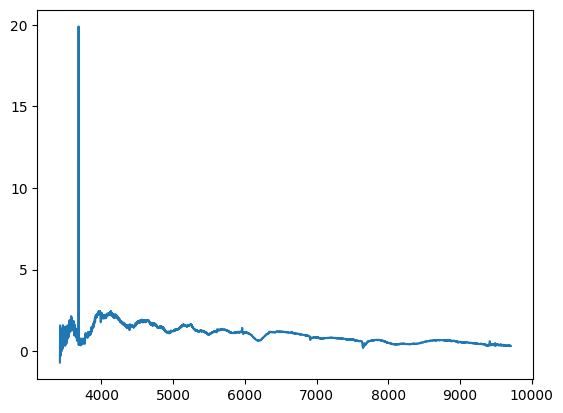

In [91]:
plt.plot(SN_spectra[4][:,0], SN_spectra[4][:,1])

min index =  197
max index =  634
max of flux slice = 19.8967
wl of max flux = 3680.72
[1.3060996  0.03010332 0.02926978]
285
5
3727
3680.72
Redshift =  -0.012417493962972955 nm error 0.030103324759919378 nm


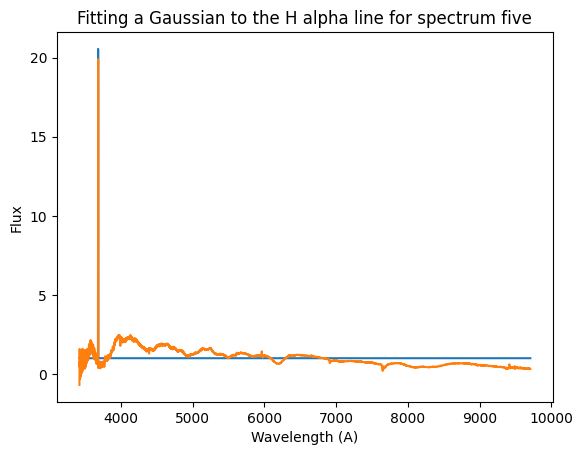

In [92]:
###SPECTRUM FIVE###
 
#defining lists that will be appended
fitted_amplitudes = []
fitted_centers = []
fitted_widths = []

#defining the columns in the first spectrum
wl = SN_spectra[4][:,0]
flux = SN_spectra[4][:,1]

min_idx = find_nearest(wl, 3600)
max_idx = find_nearest(wl, 4000)

print('min index = ', min_idx)
print('max index = ', max_idx)

wl_slice = (wl[min_idx:max_idx])
flux_slice = (flux[min_idx:max_idx])

#To find the maximum flux within the list
flux_slice_list = list(flux_slice)
max_of_flux_slice = np.max(flux_slice_list)
print('max of flux slice =', max_of_flux_slice)

#To find the index of the maximum flux within the slice
index_of_max_flux = flux_slice_list.index(max_of_flux_slice)

#To extract the same index of the wavelength slice
wl_slice_list = list(wl_slice)
wl_of_max_flux = wl_slice_list[index_of_max_flux]
print('wl of max flux =', wl_of_max_flux)

#defining the Gaussian function
def gaussian(x, amp, cen, wid):
    return (amp / (np.sqrt(2 * np.pi) * wid))* np.exp(-(x - cen)**2 / (2*wid**2)) + 1

#defining the initial guess manually, [amp, cen, wid, offset]
initial_guess = [19, wl_of_max_flux, 1]

#optimizing the guess
popt, pcov = opt.curve_fit(gaussian, wl_slice, flux_slice, p0 = initial_guess)
stdevs = np.sqrt(np.diag(pcov))
print(stdevs)
#Extract fitted parameters
amp_fit, cen_fit, wid_fit = popt

#Append fitted parameters to lists
fitted_amplitudes.append(amp_fit)
fitted_centers.append(cen_fit)
fitted_widths.append(wid_fit)

plt.plot(wl, gaussian(wl, amp_fit, cen_fit, wid_fit))

plt.plot(wl, flux)
maximum_argument = np.argmax(gaussian(wl, amp_fit, cen_fit, wid_fit))
print(maximum_argument)
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux')
plt.title('Fitting a Gaussian to the H alpha line for spectrum five')

closest_peak = find_nearest(galaxy_lines_list, wl_of_max_flux)
print(closest_peak)

closest_peak_wl = galaxy_lines_list[closest_peak]
print(closest_peak_wl)
print(wl_of_max_flux)

#To find the redshift:
z = (wl_of_max_flux - closest_peak_wl)/closest_peak_wl
redshift_list.append(z)
redshift_errors_list.append(stdevs[1])
print('Redshift = ', z, 'nm', 'error', stdevs[1], 'nm')

In [93]:
###SPECTRUM SIX###
 
#defining lists that will be appended
fitted_amplitudes = []
fitted_centers = []
fitted_widths = []

#defining the columns in the first spectrum
wl = SN_spectra[5][:,0]
flux = SN_spectra[5][:,1]

#To slice a setion of the wavelengths
def find_nearest(array, value):
    array = np.asarray(array)
    index = (np.abs(array-value)).argmin()
    return index

min_idx = find_nearest(wl, 6400)
max_idx = find_nearest(wl, 6800)

print('min index = ', min_idx)
print('max index = ', max_idx)

wl_slice = (wl[min_idx:max_idx])
flux_slice = (flux[min_idx:max_idx])

#To find the maximum flux within the list
flux_slice_list = list(flux_slice)
max_of_flux_slice = np.max(flux_slice_list)
print('max of flux slice =', max_of_flux_slice)

#To find the index of the maximum flux within the slice
index_of_max_flux = flux_slice_list.index(max_of_flux_slice)

#To extract the same index of the wavelength slice
wl_slice_list = list(wl_slice)
wl_of_max_flux = wl_slice_list[index_of_max_flux]
print('wl of max flux =', wl_of_max_flux)

#defining the Gaussian function
def gaussian(x, amp, cen, wid):
    return (amp / (np.sqrt(2 * np.pi) * wid))* np.exp(-(x - cen)**2 / (2*wid**2)) + 1.5*10**(-16)

#defining the initial guess manually, [amp, cen, wid, offset]
initial_guess = [3*10**(-16), wl_of_max_flux, 1]

#optimizing the guess
popt, pcov = opt.curve_fit(gaussian, wl_slice, flux_slice, p0 = initial_guess)
stdevs = np.sqrt(np.diag(pcov))

#Extract fitted parameters
amp_fit, cen_fit, wid_fit = popt

#Append fitted parameters to lists
fitted_amplitudes.append(amp_fit)
fitted_centers.append(cen_fit)
fitted_widths.append(wid_fit)

plt.plot(wl, gaussian(wl, amp_fit, cen_fit, wid_fit))

plt.plot(wl, flux)
maximum_argument = np.argmax(gaussian(wl, amp_fit, cen_fit, wid_fit))
print(maximum_argument)
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux')
plt.title('Fitting a Gaussian to the Halpha line for spectrum six')
mpld3.display()

#To calculate the redshift
closest_peak = find_nearest(galaxy_lines_list, wl_of_max_flux)
print(closest_peak)

closest_peak_wl = galaxy_lines_list[closest_peak]
print(closest_peak_wl)
print(wl_of_max_flux)

#To find the redshift:
z = (wl_of_max_flux - closest_peak_wl)/closest_peak_wl
redshift_list.append(z)
redshift_errors_list.append(stdevs[1])
print('Redshift = ', z, 'nm', 'error', stdevs[1], 'nm')

min index =  5032
max index =  5701
max of flux slice = 4.67702e-16
wl of max flux = 6714.54
5560
11
6717
6714.54
Redshift =  -0.0003662349263063922 nm error 0.12429229254510776 nm


min index =  527
max index =  610
max of flux slice = 6.81355e-16
wl of max flux = 6673.42
563
11
6717
6673.42
Redshift =  -0.006488015483102565 nm error 8046.938834183438 nm


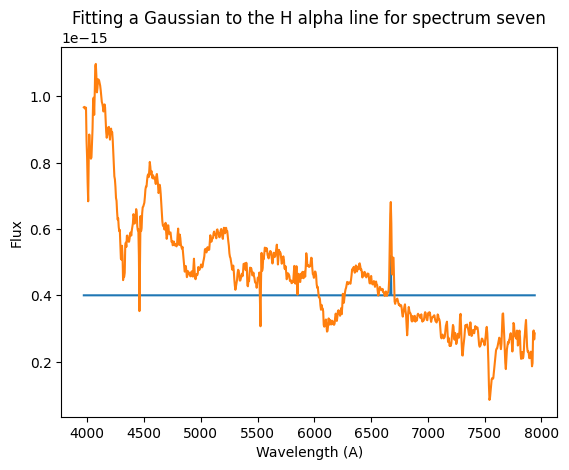

In [94]:
###SPECTRUM SEVEN###
 
#defining lists that will be appended
fitted_amplitudes = []
fitted_centers = []
fitted_widths = []

#defining the columns in the first spectrum
wl = SN_spectra[6][:,0]
flux = SN_spectra[6][:,1]

#To slice a section of the wavelengths
def find_nearest(array, value):
    array = np.asarray(array)
    index = (np.abs(array-value)).argmin()
    return index

min_idx = find_nearest(wl, 6500)
max_idx = find_nearest(wl, 6900)

print('min index = ', min_idx)
print('max index = ', max_idx)

wl_slice = (wl[min_idx:max_idx])
flux_slice = (flux[min_idx:max_idx])

#To find the maximum flux within the list
flux_slice_list = list(flux_slice)
max_of_flux_slice = np.max(flux_slice_list)
print('max of flux slice =', max_of_flux_slice)

#To find the index of the maximum flux within the slice
index_of_max_flux = flux_slice_list.index(max_of_flux_slice)

#To extract the same index of the wavelength slice
wl_slice_list = list(wl_slice)
wl_of_max_flux = wl_slice_list[index_of_max_flux]
print('wl of max flux =', wl_of_max_flux)

#defining the Gaussian function
def gaussian(x, amp, cen, wid):
    return (amp / (np.sqrt(2 * np.pi) * wid))* np.exp(-(x - cen)**2 / (2*wid**2)) + 0.4*10**(-15)

#defining the initial guess manually, [amp, cen, wid, offset]
initial_guess = [0.3*10**(-15), wl_of_max_flux, 1]

#optimizing the guess
popt, pcov = opt.curve_fit(gaussian, wl_slice, flux_slice, p0 = initial_guess)
stdevs = np.sqrt(np.diag(pcov))

#Extract fitted parameters
amp_fit, cen_fit, wid_fit = popt

#Append fitted parameters to lists
fitted_amplitudes.append(amp_fit)
fitted_centers.append(cen_fit)
fitted_widths.append(wid_fit)

plt.plot(wl, gaussian(wl, amp_fit, cen_fit, wid_fit))

plt.plot(wl, flux)
maximum_argument = np.argmax(gaussian(wl, amp_fit, cen_fit, wid_fit))
print(maximum_argument)
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux')
plt.title('Fitting a Gaussian to the H alpha line for spectrum seven')

#To calculate the redshift
closest_peak = find_nearest(galaxy_lines_list, wl_of_max_flux)
print(closest_peak)

closest_peak_wl = galaxy_lines_list[closest_peak]
print(closest_peak_wl)
print(wl_of_max_flux)

#To find the redshift:
z = (wl_of_max_flux - closest_peak_wl)/closest_peak_wl
redshift_list.append(z)
redshift_errors_list.append(stdevs[1])
print('Redshift = ', z, 'nm', 'error', stdevs[1], 'nm')

In [95]:
print(len(redshift_list))

7


In [96]:
#PART B

In [97]:
#To read the SN_lightcurves data as data frames
paths = ['sn1997bp_UBVRI.dat', 'sn1997E_UBVRI.dat', 'sn1998es_UBVRI.dat', 'sn1999aa_UBVRI.dat', 'sn1999dq_UBVRI.dat', 'sn2000cn_UBVRI.dat', 'sn2000dk_UBVRI.dat']
SN_lightcurves = []
for path in paths:
    SN_lightcurve = pd.read_csv(f'Data_for_download/SN_lightcurves/{path}')
    SN_lightcurve_df = pd.DataFrame(data=SN_lightcurve)
    SN_lightcurves.append(SN_lightcurve_df)

#print(SN_lightcurves[0])
#SN_lightcurves[0] = SN_lightcurves[0].reset_index(drop=False)
print(SN_lightcurves[0].shape)
print(SN_lightcurves[0].iloc[:,0])

print(SN_lightcurves[0].keys())
#plt.plot(SN_lightcurves[0].iloc[:,1], SN_lightcurves[0].iloc[:,2])

(16, 1)
# photometry from Jha et al. 2006                                                 AJ 131    527.0
#                                                                                 NaN         NaN
#  HJD         U    +/-      B    +/-      V    +/-      R    +/-      I    +/-   NaN         NaN
2450546.79  14.077 0.036  14.122 0.012  14.018 0.007  13.921 0.010  14.144 0.011  NaN         NaN
2450547.80  14.079 0.038  14.097 0.014  13.980 0.009  13.894 0.012  14.133 0.014  NaN         NaN
2450548.79  14.110 0.036  14.085 0.012  13.934 0.007  13.838 0.009  14.105 0.011  NaN         NaN
2450549.80  14.175 0.037  14.109 0.014  13.902 0.009  13.812 0.015  14.119 0.013  NaN         NaN
2450550.76  14.229 0.035  14.124 0.013  13.879 0.008  13.792 0.013  14.150 0.018  NaN         NaN
2450552.82  14.340 0.037  14.179 0.015  13.875 0.009  13.762 0.012  14.169 0.013  NaN         NaN
2450567.77  15.914 0.039  15.680 0.017  14.594 0.010  14.494 0.015  14.564 0.024  NaN         NaN
2450569.71  

In [98]:
import warnings

#To read in the light curves data and place all light curves into a list
paths = ['sn1997bp_UBVRI.dat', 'sn1997E_UBVRI.dat', 'sn1998es_UBVRI.dat', 'sn1999aa_UBVRI.dat', 'sn1999dq_UBVRI.dat', 'sn2000cn_UBVRI.dat', 'sn2000dk_UBVRI.dat']
SN_lightcurves = []
for path in paths:
    SN_lightcurve = ascii.read(f'Data_for_download/SN_lightcurves/{path}')
    SN_lightcurves.append(SN_lightcurve)

#name the columns
#Bmagerlist = []
for i in range(0,7):
    B_mag_error = SN_lightcurves[i]['col5']
    #Bmagerlist.append(B_mag_error)
    print(len(B_mag_error))

for i in range(0,7):
    B_mag = SN_lightcurves[i]['col4']
    print(len(B_mag))

13
13
20
23
29
20
13
13
13
20
23
29
20
13


Peak brightness in the B-band, spectrum 1 =  14.085 error = 0.016
delta B mag, spectrum 1 = 0.011999999999998678 error = 0.02262741699796952
Peak brightness in the B-band, spectrum 2 =  15.62 error = 0.025
delta B mag, spectrum 2 = 0.0470000000000006 error = 0.0567978872846517
Peak brightness in the B-band, spectrum 3 =  13.945 error = 0.036
delta B mag, spectrum 3 = 0.08699999999999974 error = 0.05091168824543142
Peak brightness in the B-band, spectrum 4 =  14.876 error = 0.018
delta B mag, spectrum 4 = 0.40000000000000036 error = 0.06744627491566899
Peak brightness in the B-band, spectrum 5 =  14.845 error = 0.022
delta B mag, spectrum 5 = 0.007999999999999119 error = 0.027202941017470887
Peak brightness in the B-band, spectrum 6 =  16.896 error = 9.999
delta B mag, spectrum 6 = 0.4529999999999994 error = 14.14072141016858
Peak brightness in the B-band, spectrum 7 =  15.63 error = 0.052
delta B mag, spectrum 7 = 0.03399999999999892 error = 0.08720091742636657


C:\Users\35383\AppData\Local\Temp\ipykernel_15244\3533609212.py:72: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


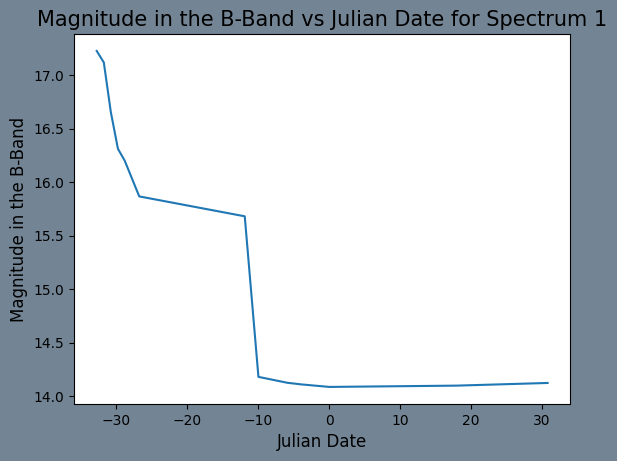

<Figure size 640x480 with 0 Axes>

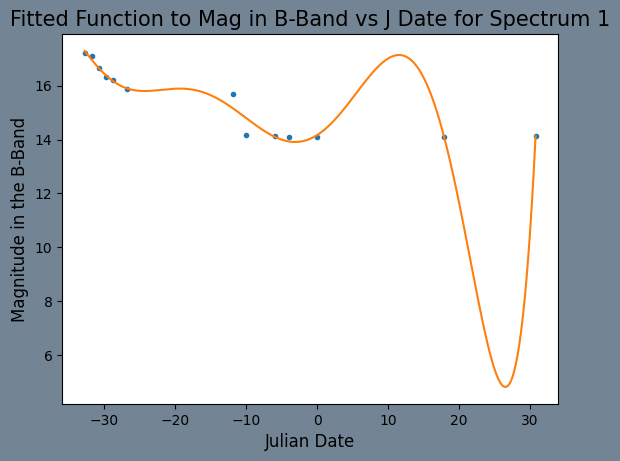

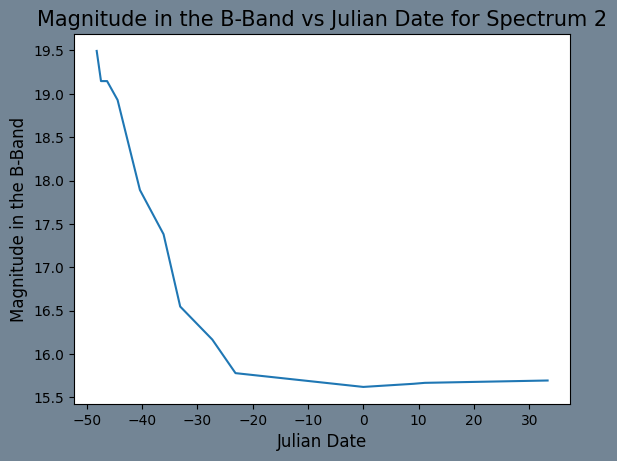

<Figure size 640x480 with 0 Axes>

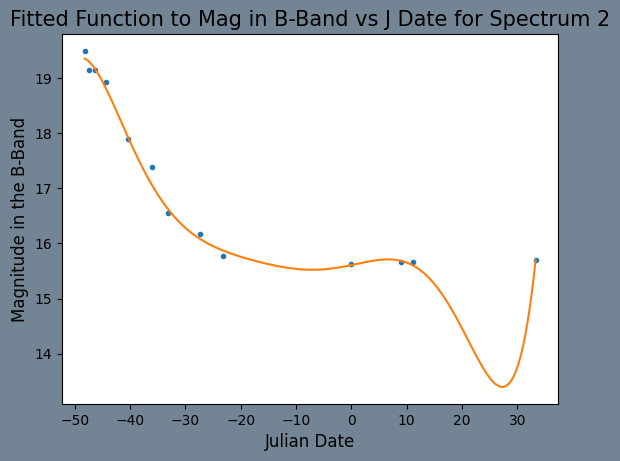

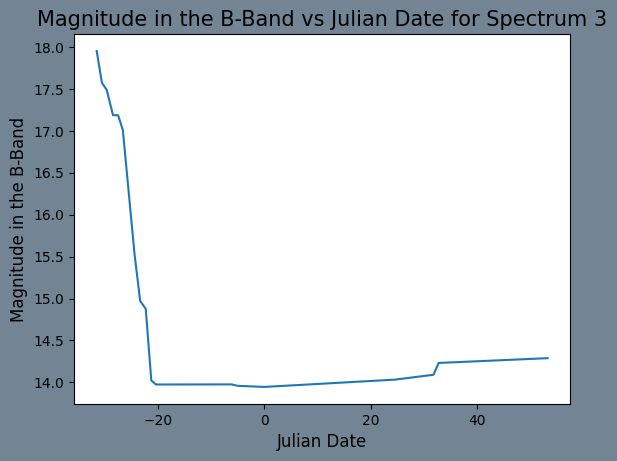

<Figure size 640x480 with 0 Axes>

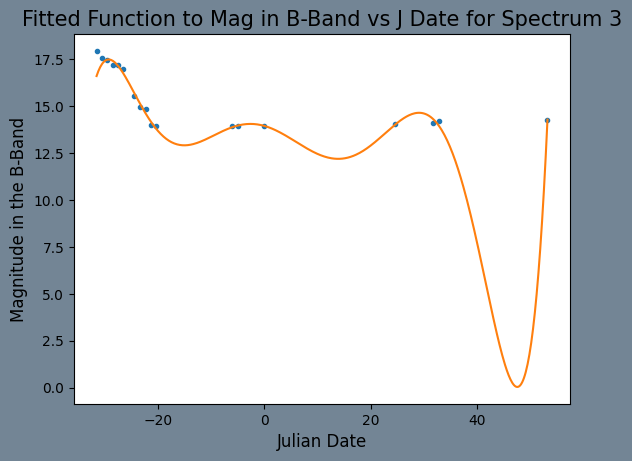

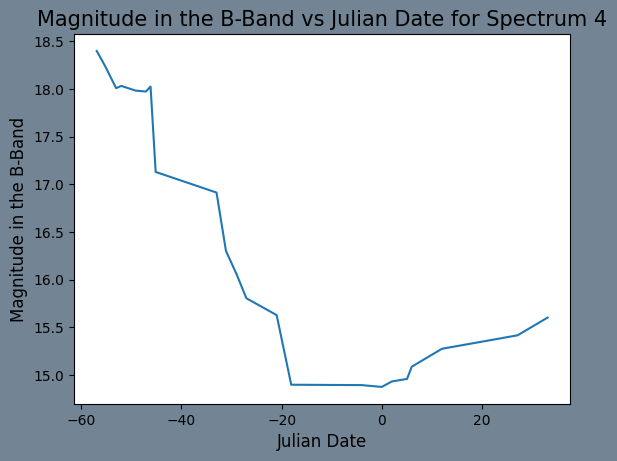

<Figure size 640x480 with 0 Axes>

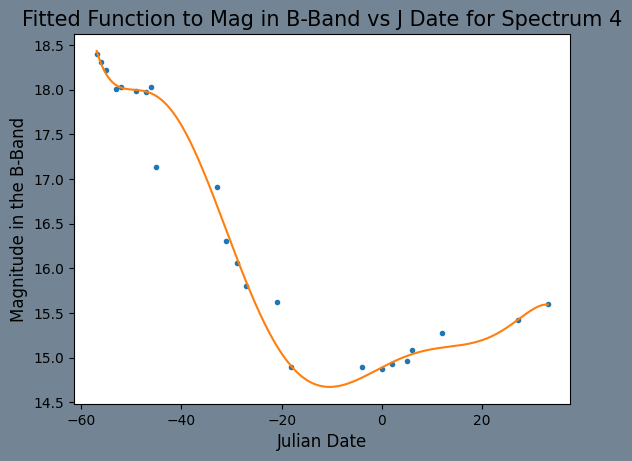

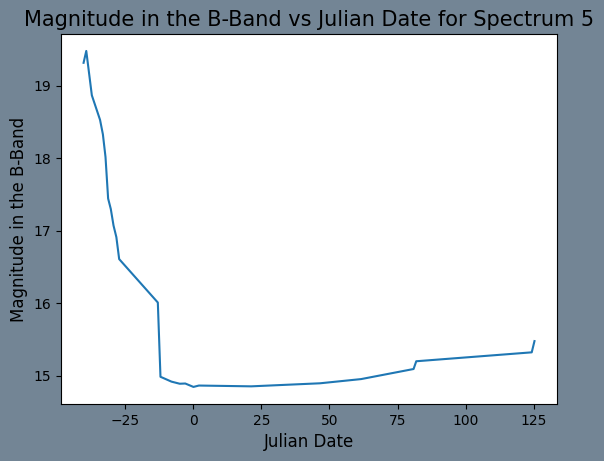

<Figure size 640x480 with 0 Axes>

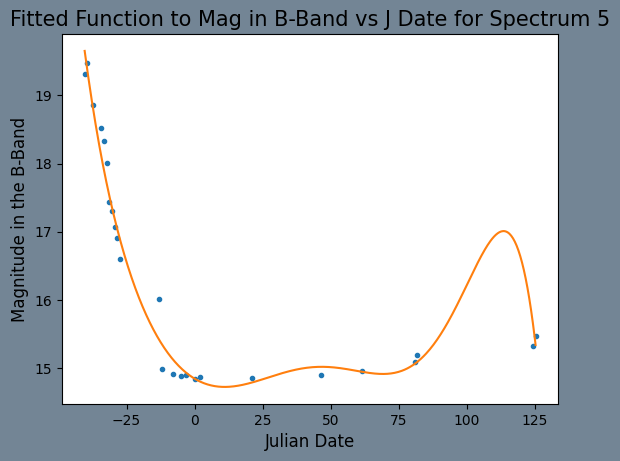

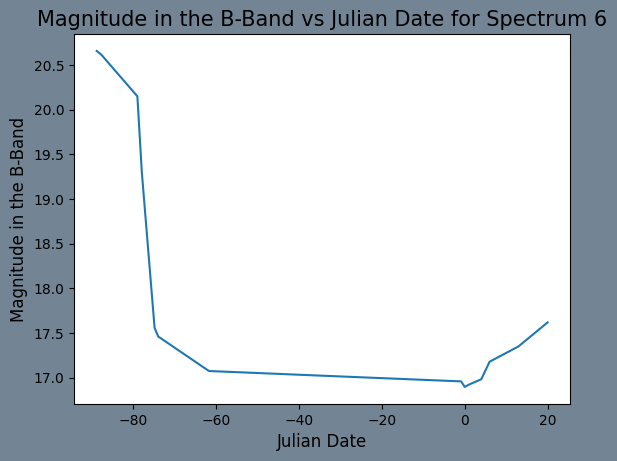

<Figure size 640x480 with 0 Axes>

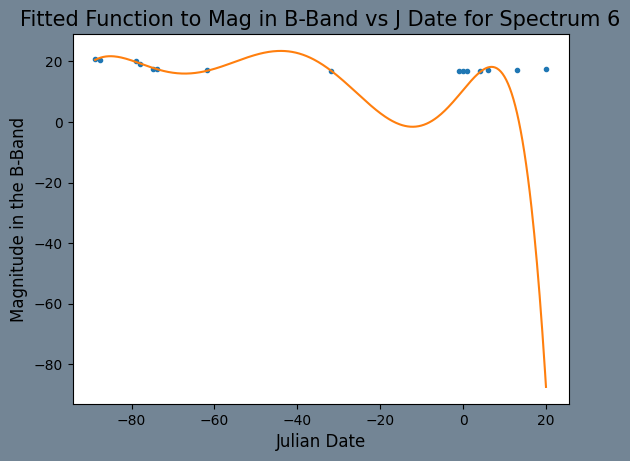

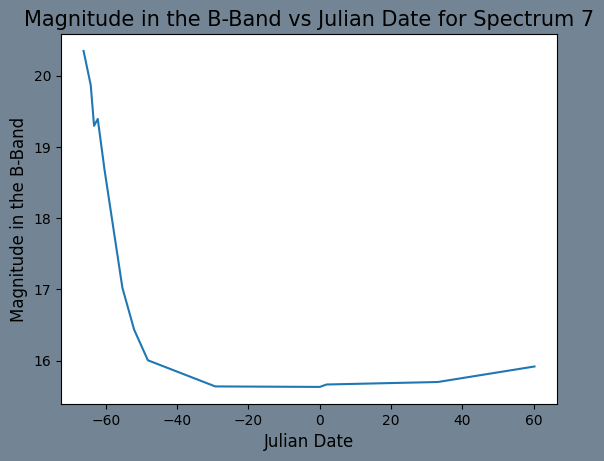

<Figure size 640x480 with 0 Axes>

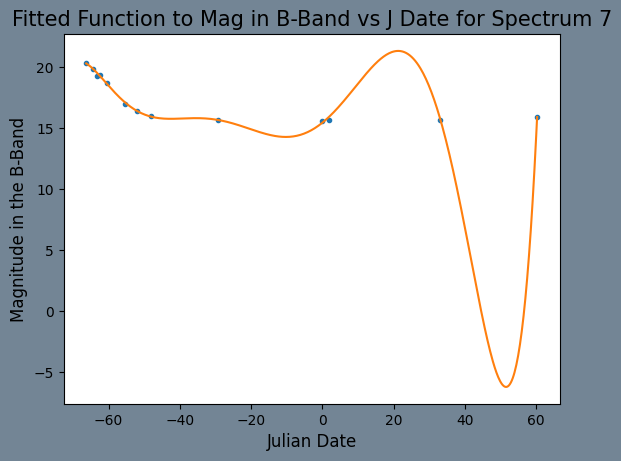

In [99]:
import warnings

#To read in the light curves data and place all light curves into a list
paths = ['sn1997bp_UBVRI.dat', 'sn1997E_UBVRI.dat', 'sn1998es_UBVRI.dat', 'sn1999aa_UBVRI.dat', 'sn1999dq_UBVRI.dat', 'sn2000cn_UBVRI.dat', 'sn2000dk_UBVRI.dat']
SN_lightcurves = []
for path in paths:
    SN_lightcurve = ascii.read(f'Data_for_download/SN_lightcurves/{path}')
    SN_lightcurves.append(SN_lightcurve)

list_of_B_mag_maxes = []
delta_m_list = []
delta_m_error_list = []
B_max_errors = []

for i in range(0,7):
    B_mag = SN_lightcurves[i]['col4']
    B_mag = B_mag[::-1]
    julian_d = SN_lightcurves[i]['col1']
    julian_d_list = list(julian_d)
    B_mag_error = SN_lightcurves[i]['col5']

    #remove B_mag = 99.999
    mask = B_mag != 99.999
    B_mag = B_mag[mask]
    julian_d_list = julian_d[mask]
    B_mag_error = B_mag_error[mask]
    Julian_d = julian_d_list
    
    # print(B_mag)
    # print('B mag error =', B_mag_error)
    B_mag_list = list(B_mag)

    max_of_B_mag = min(B_mag)
    list_of_B_mag_maxes.append(max_of_B_mag)
    #print('Max of B mag =', max_of_B_mag)
    
    index_of_max_B = B_mag_list.index(max_of_B_mag)
    julian_date_cor_to_B_mag_max = Julian_d[index_of_max_B]

    #Correct the peak to zero (Julian date)
    new_j_d_list = []
    for x in julian_d_list:
        y = x - julian_date_cor_to_B_mag_max
        new_j_d_list.append(y)
    
    #Correct for redshift
    corrected_julian_d = []
    for x in new_j_d_list: 
        corrected_j_d = x/(1 + redshift_list[i])
        corrected_julian_d.append(corrected_j_d)

    Julian_d = corrected_julian_d
    
    fig = plt.figure()
    plt.xlabel('Julian Date', fontsize = 12)
    plt.ylabel('Magnitude in the B-Band', fontsize = 12)
    plt.title(f'Magnitude in the B-Band vs Julian Date for Spectrum {i + 1}', fontsize = 15)
    plt.plot(corrected_julian_d, B_mag)
    fig.patch.set_facecolor('xkcd:steel')

    with warnings.catch_warnings():
        warnings.simplefilter('ignore', np.RankWarning)
        p30 = np.poly1d(np.polyfit(Julian_d, B_mag, 5))


    #weight is one over errors
    B_errors = 1/B_mag_error
    fig = plt.figure()
    polyfit = np.polyfit(Julian_d, B_mag, 7, w=B_errors)
    p = np.poly1d(polyfit)
    xp = np.linspace(Julian_d[0], Julian_d[-1], 500)
    fig = plt.figure()
    plt.xlabel('Julian Date', fontsize = 12)
    plt.ylabel('Magnitude in the B-Band', fontsize = 12)
    plt.title(f'Fitted Function to Mag in B-Band vs J Date for Spectrum {i+1}', fontsize = 15)
    plt.plot(Julian_d, B_mag, '.', xp, p(xp), '-')
    fig.patch.set_facecolor('xkcd:steel')
    #find the maximum magnitude
    max_B_mag = min(B_mag)

    #To find the corresponding date
    B_mag_list = list(B_mag)
    index_max_B_mag = B_mag_list.index(min(B_mag_list))
    error_max_B_mag = B_mag_error[index_max_B_mag]
    B_max_errors.append(error_max_B_mag)
    print(f'Peak brightness in the B-band, spectrum {i + 1} = ', max_B_mag, 'error =', error_max_B_mag )
    J_date_B_max = Julian_d[index_max_B_mag]
    #print(f'Julian date corresponding to the maximum B magnitude {i} = ', J_date_B_max)

    #To find the Julian date 15 days after this
    J_date_plus_15 = J_date_B_max + 15
    #print(f'Julian date 15 days after the maximum B magnitude {i} = ', J_date_plus_15)
    Julian_d_list = list(Julian_d)

    #To find the index of the closest date to 15 days after 
    closest_date_to_15_days_later = find_nearest(Julian_d_list, J_date_plus_15)
    #print(f'Closest J date to 15 days later {i} = ', closest_date_to_15_days_later)

    B_mag_15_days_later = B_mag[closest_date_to_15_days_later]
    #print(f'B mag 15 days later {i} = ', B_mag_15_days_later)

    #To get the difference in the B mags
    delta_m = B_mag_15_days_later - min(B_mag_list)
    delta_m_list.append(delta_m)
    #error of delta m
    delta_m_error = np.sqrt(B_mag_error[index_max_B_mag]**2 + B_mag_error[closest_date_to_15_days_later]**2)
    delta_m_error_list.append(delta_m_error)
    print(f'delta B mag, spectrum {i + 1} =', delta_m, 'error =', delta_m_error)

In [100]:
print(B_max_errors)

[0.016, 0.025, 0.036, 0.018, 0.022, 9.999, 0.052]


In [101]:
#Part C

[<Quantity 25.19034737 Mpc>, <Quantity -41.35464137 Mpc>, <Quantity -104.17478889 Mpc>, <Quantity -13.86981091 Mpc>, <Quantity -53.18101482 Mpc>, <Quantity -1.56849241 Mpc>, <Quantity -27.78654442 Mpc>]
absolute magnitudes = [2.952695597729182, 2.009076694370197, -4.285350753866545, 6.727426994280732, -0.023507341799398063, 19.645425449044602, 4.007240551183678]
delta m list = [0.011999999999998678, 0.0470000000000006, 0.08699999999999974, 0.40000000000000036, 0.007999999999999119, 0.4529999999999994, 0.03399999999999892]
error = [0.027202941017470887, 0.02262741699796952, 0.08720091742636657, 0.0567978872846517, 0.05091168824543142, 0.06744627491566899, 0.1414072141016858]
slope of best fit = 1.5249348493492647


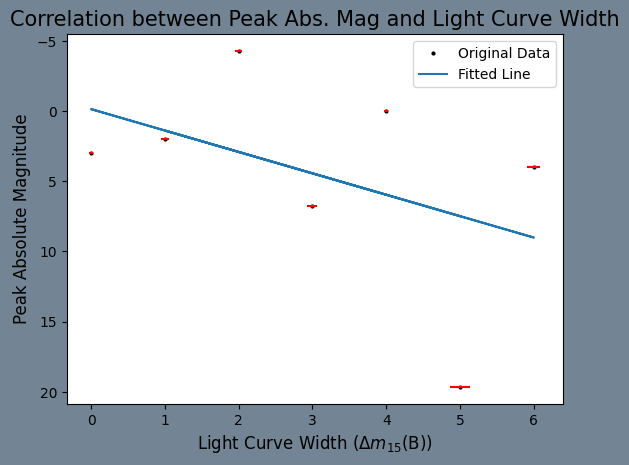

In [102]:
CDM = acos.FlatLambdaCDM(H0 = 70, Om0=0)

comoving_list = []

#to convert the redshift to comoving distance
for i in redshift_list:
    dc = CDM.comoving_distance(i)
    comoving_list.append(dc)

print(comoving_list)

#extract the numerical distances
numerical_distances = [item.value for item in comoving_list]

#convert magnitudes to absolute magnitudes
absolute_magnitudes = []

for m, i in zip(list_of_B_mag_maxes, numerical_distances):
    M = m + 5 - 5*np.log(np.abs(i))
    absolute_magnitudes.append(M)

print('absolute magnitudes =', absolute_magnitudes)
print('delta m list =', delta_m_list)

#make absolute magnitudes a list
absolute_magnitudes_list = list(absolute_magnitudes)

#put the delta m in ascending order and put the absolute magnitudes into the same order
sorted_delta_m_list = sorted(range(len(delta_m_list)), key=lambda i: delta_m_list[i])
sorted_absolute_magnitudes = [absolute_magnitudes[i] for i in sorted_delta_m_list]
sorted_error_list = [delta_m_error_list[i] for i in sorted_delta_m_list]

#plot
fig = plt.figure()
plt.plot(sorted_delta_m_list, sorted_absolute_magnitudes, '.', label = 'Original Data', markersize = '4', color = 'k')

#linear fit
slope, intercept = np.polyfit(sorted_delta_m_list, sorted_absolute_magnitudes, 1)

s_ab_mag_list = []
for i in sorted_delta_m_list:
    linear_fit = slope * i + intercept
    s_ab_mag_list.append(linear_fit)
sorted_error_list[-1] = sorted_error_list[-1]/100
error = sorted_error_list
print('error =', sorted_error_list)

#plot linear fit on top of original data 
plt.plot(sorted_delta_m_list, s_ab_mag_list, label = 'Fitted Line')
plt.errorbar(sorted_delta_m_list, sorted_absolute_magnitudes, xerr = error, linestyle = 'None', color = 'r')
plt.ylabel('Peak Absolute Magnitude', fontsize = 12)
plt.xlabel('Light Curve Width ($\Delta m _{15}$(B))', fontsize = 12)
plt.title('Correlation between Peak Abs. Mag and Light Curve Width', fontsize = 15)
plt.gca().invert_yaxis()
plt.legend()
fig.patch.set_facecolor('xkcd:steel')
print('slope of best fit =', slope)

# result = linregress(s_ab_mag_list, sorted_absolute_magnitudes)
# slope, intercept, r, p, se = linregress(sorted_delta_m_list, s_ab_mag_list)

Second last error bar has been /100. 

In [103]:
#Correct the peak magnitudes of the SNe Ia
corrected_peak_magnitudes = []
for m, d in zip(sorted_absolute_magnitudes, sorted_delta_m_list):
    m_B_corr = m - slope * (d - 1.1)
    corrected_peak_magnitudes.append(m_B_corr)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


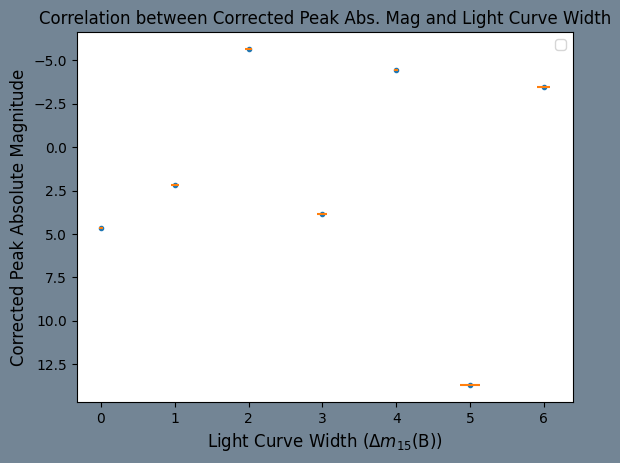

In [104]:
#plot the corrected peak magnitudes
fig = plt.figure()
plt.plot(sorted_delta_m_list, corrected_peak_magnitudes, '.')
plt.errorbar(sorted_delta_m_list, corrected_peak_magnitudes, xerr = error, linestyle = 'None')
plt.ylabel('Corrected Peak Absolute Magnitude', fontsize = 12)
plt.xlabel('Light Curve Width ($\Delta m _{15}$(B))', fontsize = 12)
plt.title('Correlation between Corrected Peak Abs. Mag and Light Curve Width', fontsize = 12)
plt.gca().invert_yaxis()
plt.legend()
fig.patch.set_facecolor('xkcd:steel')

#linear fit
slope1, intercept1 = np.polyfit(sorted_delta_m_list, corrected_peak_magnitudes, 1)

s_ab_mag_list1 = []
for i in sorted_delta_m_list:
    linear_fit1 = slope1 * i + intercept1
    s_ab_mag_list1.append(linear_fit1)

#plt.plot(sorted_delta_m_list, s_ab_mag_list1, label = 'Fitted Line')

[1764545.0402552143, -2896828.941491723, -7297283.53140919, -971558.8945532732, -3725248.1888918863, -109870.47789191766, -1946404.6449307695]
log cz = [14.383403447560982, 14.879127228232777, 15.803012717880126, 13.78665716825067, 15.130644035466696, 11.607057477297896, 14.481494456870083]
[14.085, 15.62, 13.945, 14.876, 14.845, 16.896, 15.63]
[0.016, 0.025, 0.036, 0.018, 0.022, 9.999, 0.052]
log errors = [0.8020338265002236, 1.350301866266119, 3.4260756705689666, 2.586004887530835, 3.503119656187069, 2.0851192892656303, 2.4]


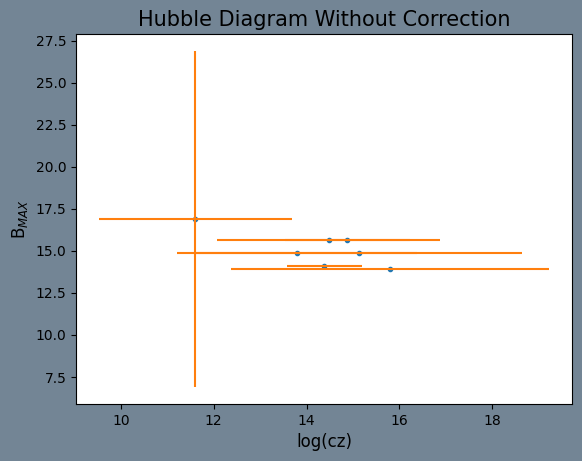

In [105]:
#Plot the Hubble Diagram
#plt.plot(np.log(c*z), )
c = 3*10**8

redshift_by_c = []
for i in redshift_list:
    x_1 = c*i
    redshift_by_c.append(x_1)
print(redshift_by_c)

log_cz = []
for i in redshift_by_c:
    x = np.log(np.abs(i))
    log_cz.append(x)
print('log cz =', log_cz)

print(list_of_B_mag_maxes)

log_errors = []
for i in redshift_errors_list:
    x = np.log(i)
    log_errors.append(np.abs(x))

log_errors[-1] = 2.4

print(B_max_errors)
print('log errors =', log_errors)
fig = plt.figure()
plt.plot(log_cz, list_of_B_mag_maxes, '.')
plt.title('Hubble Diagram Without Correction', fontsize = 15)
plt.errorbar(log_cz, list_of_B_mag_maxes, xerr = log_errors, yerr = B_max_errors, linestyle = 'None')
plt.xlabel('log(cz)', fontsize = 12)
plt.ylabel(r'B$_{MAX}$', fontsize = 12)
fig.patch.set_facecolor('xkcd:steel')
#mpld3.display()

1.5249348493492647


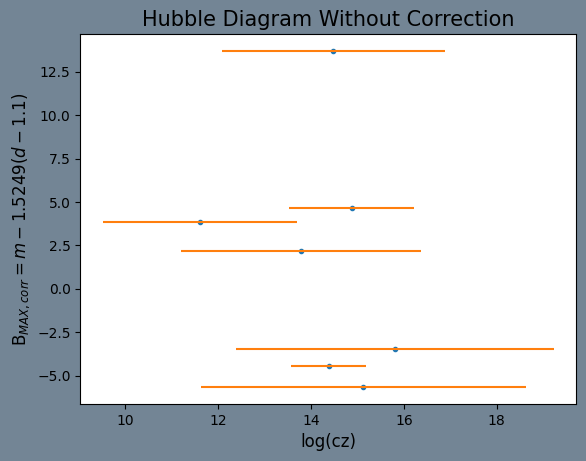

In [106]:
#Plot the second Hubble Diagram
print(slope)
fig = plt.figure()
plt.plot(log_cz, corrected_peak_magnitudes, '.')
plt.errorbar(log_cz, corrected_peak_magnitudes, xerr = log_errors, linestyle = 'None')
plt.title('Hubble Diagram Without Correction', fontsize = 15)
plt.xlabel('log(cz)', fontsize = 12)
plt.ylabel(r'B$_{MAX, corr} = m -  1.5249(d - 1.1)$', fontsize = 12)
fig.patch.set_facecolor('xkcd:steel')

###PART 2###

In [107]:
all_supernovae = pd.read_csv('Allsupernovae.csv')
print(all_supernovae)
print(list(all_supernovae))

         Name      zcmb      zhel  error         mb  error_mb        X1  \
0      03D1au  0.503084  0.504300      0  23.001698  0.088031  1.273191   
1      03D1aw  0.580724  0.582000      0  23.573937  0.090132  0.974346   
2      03D1ax  0.494795  0.496000      0  22.960139  0.088110 -0.728837   
3      03D1bp  0.345928  0.347000      0  22.398137  0.087263 -1.155110   
4      03D1co  0.677662  0.679000      0  24.078115  0.098356  0.618820   
..        ...       ...       ...    ...        ...       ...       ...   
735  sn2007co  0.027064  0.026962      0  16.504006  0.141685 -0.137806   
736  sn2007cq  0.025468  0.025918      0  15.797848  0.143429 -0.657941   
737   sn2007f  0.023810  0.023590      0  15.895501  0.144315  0.618766   
738  sn2007qe  0.023867  0.024000      0  16.068268  0.144350  0.760605   
739  sn2008bf  0.022068  0.021275      0  15.718540  0.144685  0.430639   

     error_X1         c   error_c  ...  Mst_lower  logSFR  SFR_upper  \
0    0.150058 -0.012353  0.

In [108]:
#define parameters
redshifts = all_supernovae['zcmb']
alpha = 0.141
alpha_error = .006
beta = 3.101
beta_error = .075
M_B = -19.05
M_B_error = .02
delta_m = -0.07
delta_m_error = .02
mb = all_supernovae['mb'].values
mb_error = all_supernovae['error_mb'].values
X1 = all_supernovae['X1'].values
X1_error = all_supernovae['error_X1'].values
c = all_supernovae['c'].values
c_error = all_supernovae['error_c']
log10_tot_stellar_mass = all_supernovae['LogMst'].values
error_Mst = all_supernovae['error_Mst'].values
z_error = all_supernovae['error'].values

In [77]:
!pip install mpld3
from mpld3 import plugins


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\35383\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


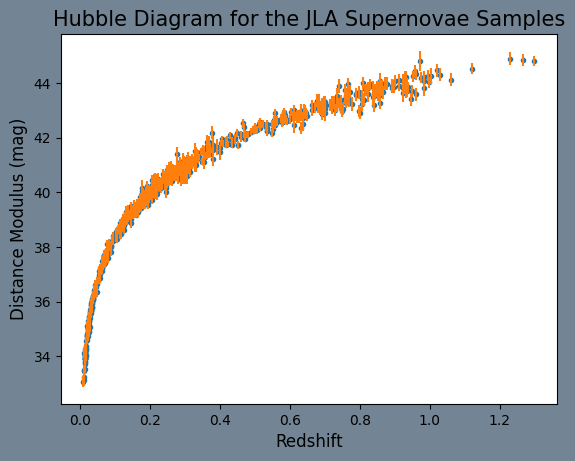

In [78]:
#To find M_B or M_b + delta_m
log_stellar_mass_list = np.array(log10_tot_stellar_mass)
stellar_masses = list(10**log_stellar_mass_list)
#print(stellar_masses)

#Getting errors
composite_M_B_error = np.sqrt(M_B_error**2 + delta_m_error**2)

distance_modulus_error = []

for i in range(len(X1)):
    if stellar_masses[i] > 10**10:
        error = np.sqrt(mb_error[i]**2 + composite_M_B_error**2 + ((alpha * X1[i]) * np.sqrt((alpha_error/alpha)**2 + (X1_error[i]/X1[i])**2))**2 + ((beta * c[i]) * np.sqrt((beta_error/beta)**2 + (c_error[i]/c[i])**2))**2)
        distance_modulus_error.append(error)
    else:
        error = np.sqrt(mb_error[i]**2 + M_B_error**2 + ((alpha * X1[i]) * np.sqrt((alpha_error/alpha)**2 + (X1_error[i]/X1[i])**2))**2 + ((beta * c[i]) * np.sqrt((beta_error/beta)**2 + (c_error[i]/c[i])**2))**2)
        distance_modulus_error.append(error)


M_B_plus_delta_m = M_B + delta_m

distance_moduli = []

#distance modulus
for i in range(len(stellar_masses)):
    if stellar_masses[i] > 10**10:
        distance_mod = mb[i] - M_B_plus_delta_m + alpha * X1[i] - beta * c[i]
        distance_moduli.append(distance_mod)
    else:
        distance_mod = mb[i] - M_B + alpha * X1[i] - beta * c[i]
        distance_moduli.append(distance_mod)

#plot redshift against distance modulus
fig = plt.figure()
plt.plot(redshifts, distance_moduli, '.')
plt.errorbar(redshifts, distance_moduli, yerr = distance_modulus_error, linestyle = 'None')
plt.xlabel('Redshift', fontsize = 12)
plt.ylabel('Distance Modulus (mag)', fontsize = 12)
plt.title('Hubble Diagram for the JLA Supernovae Samples', fontsize = 15)
fig.patch.set_facecolor('xkcd:steel')
#mpld3.display()


#print(distance_moduli)

D part 2

Chi squared 1 = 16656593.658287121


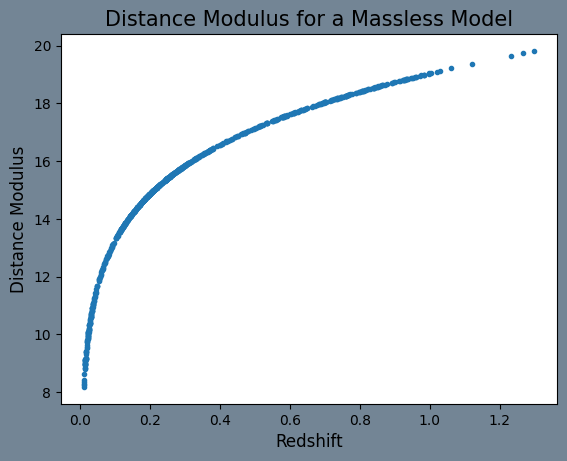

In [79]:
#massless model (equation five)

H_0 = 70 #km/s/Mpc
c_l = 3 * 10**5 #km/s

massless_model = []

for i in range(len(redshifts)):
    d = ((c_l*redshifts[i])/H_0) * (1 + (redshifts[i]/2))
    massless_model.append(d)

#make it distance modulus
massless_model_modulus = 5 * np.log10(massless_model)

#plot
fig = plt.figure()
plt.plot(redshifts, massless_model_modulus, '.')
plt.xlabel('Redshift', fontsize = 12)
plt.ylabel('Distance Modulus', fontsize = 12)
plt.title('Distance Modulus for a Massless Model', fontsize = 15)
fig.patch.set_facecolor('xkcd:steel')

residuals = []
for i, j in zip(massless_model_modulus, distance_moduli):
    residual = i - j
    residuals.append(residual)

#print('Residuals 1 =', residuals)

#Defining a function to find chi_squared statistics
def chi_squared(x, y, err):
    for i, j in zip(x, y):
        residuals = i - j
        chi_squared = np.sum((residuals / err) ** 2)
        return chi_squared

chi1 = chi_squared(distance_moduli, massless_model_modulus, distance_modulus_error)

print('Chi squared 1 =', chi1)

Chi squared 2 = 2103.2567752593104


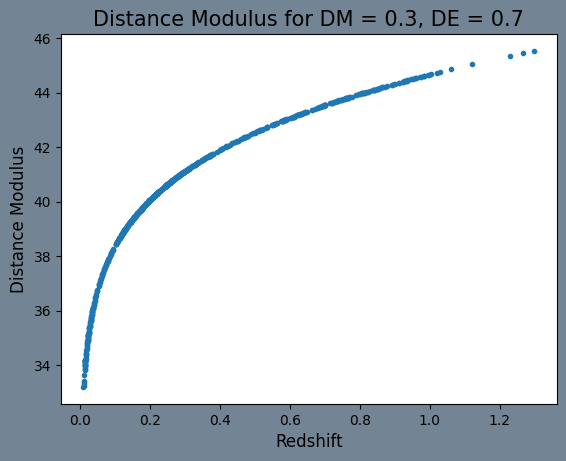

In [150]:
#a model corresponding to the preferred cosmological model from CMB and SN Ia measurements

H_0 = 70 #km/s/Mpc
cosmo = acos.FlatLambdaCDM(H0 = H_0, Om0 = 0.3)

distance_modulus_03 = CDM.distmod(redshifts)

distance_modulus_03_list = []

for i in range(len(distance_modulus_03)):
    distance_modulus_03_list.append(distance_modulus_03[i].value)

#for i in range(len(distance_modulus_03_list)):
#    joined = distance_modulus_03_list[i][0] + '.' + distance_modulus_03_list[i][1]
#    distance_modulus_03.append(float(joined))

fig = plt.figure()
plt.plot(redshifts, distance_modulus_03_list, '.')
plt.xlabel('Redshift', fontsize = 12)
plt.title('Distance Modulus for DM = 0.3, DE = 0.7', fontsize = 15)
plt.ylabel('Distance Modulus', fontsize = 12)
fig.patch.set_facecolor('xkcd:steel')


residuals03 = []
for i, j in zip(distance_modulus_03_list, distance_moduli,):
    residuals03.append(np.abs(i - j))

#print('Residuals 2 =', residuals03)

chi2 = chi_squared(distance_moduli, distance_modulus_03_list, distance_modulus_error)

print('Chi squared 2 =', chi2)

Chi squared 3 = 2103.2567752593104


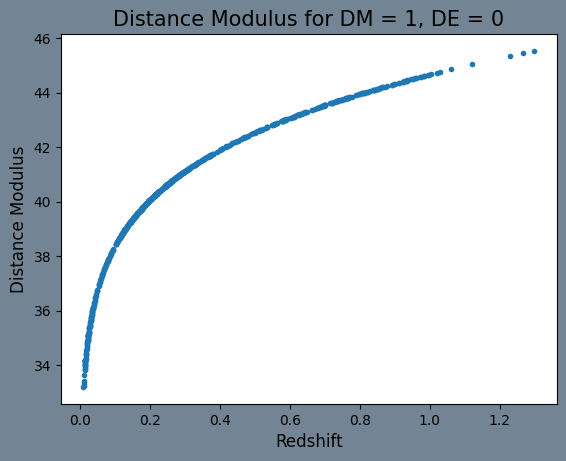

In [49]:
#a flat Universe model assuming matter but no dark energy

cosmo = acos.FlatLambdaCDM(H0 = H_0, Om0 = 1)

distance_modulus_1 = CDM.distmod(redshifts)

distance_modulus_11 = []
for i in range(len(distance_modulus_1)):
    distance_modulus_11.append(distance_modulus_1[i].value)

fig = plt.figure()
plt.plot(redshifts, distance_modulus_11, '.')
plt.xlabel('Redshift', fontsize = 12)
plt.title('Distance Modulus for DM = 1, DE = 0', fontsize = 15)
plt.ylabel('Distance Modulus', fontsize = 12)
fig.patch.set_facecolor('xkcd:steel')

residuals3 = []
for i, j in zip(distance_moduli, distance_modulus_11):
    residuals3.append(np.abs(i - j))

#print('Residuals 3 =', residuals3)

chi3 = chi_squared(distance_moduli, distance_modulus_11, distance_modulus_error)

print('Chi squared 3 =', chi3)

In [182]:
print(distance_modulus_1[0])

42.55173210042617 mag


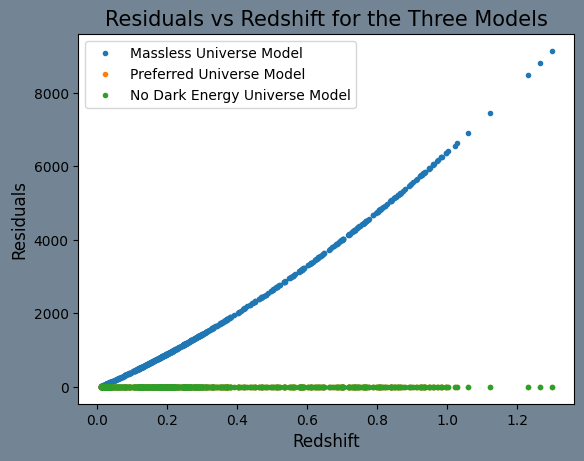

In [237]:
#plot residuals 
fig = plt.figure()
plt.plot(redshifts, residuals, '.', label = 'Massless Universe Model')
plt.plot(redshifts, residuals3, '.', label = 'Preferred Universe Model')
plt.plot(redshifts, residuals03, '.', label = 'No Dark Energy Universe Model')
fig.patch.set_facecolor('xkcd:steel')
plt.xlabel('Redshift', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residuals vs Redshift for the Three Models', fontsize = 15)
plt.legend()